# **IV. Quick stats around the depolymerase scan**

### The goal here is to have an idea of the nature of the infered depolymerase 
> The ratios of the different domains observed related to depolymerase activity

## 1. Stats 
***



> Get a subset of each IPR - Index match

In [2]:
import pandas as pd 
import os 
from Bio import SeqIO

#path_work = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"
path_work = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_work}/DF_Dpo.final.2705.tsv", sep = "\t" ,  header = 0 )

DF_embeddings = pd.read_csv(f"{path_work}/Dpo.2705.embeddings.ultimate.csv", sep = ",", header= None )
DF_embeddings.rename(columns={0: 'index'}, inplace=True)

DF_info_filtered = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]
DF_info_ToReLabel = DF_info[DF_info["KL_type_LCA"].str.contains("\\|")]


all_data = pd.merge(DF_info_filtered , DF_embeddings , on = "index")
all_data_info = all_data[["Phage", "KL_type_LCA", "Infected_ancestor", "index","Dataset", "seq"]]

In [ ]:
old_dpos = {rec.id : str(rec.seq) for rec in SeqIO.parse(f"{path_work}/Dpo_domains.0805.final.ultimate.multi.fasta" , "fasta")}
new_dpo = {rec.id : str(rec.seq) for rec in SeqIO.parse(f"{path_work}/anubis_Dpo_domains.multi.fasta" , "fasta")}

old_dpos.update(new_dpo)


DF_embeddings = pd.read_csv(f"{path_work}/Dpo.2705.embeddings.ultimate.csv", sep = ",", header= None )
DF_embeddings.rename(columns={0: 'index'}, inplace=True)

all_data = pd.merge(DF_info , DF_embeddings , on = "index")
all_data_info = all_data[['Phage', 'KL_type_LCA', 'Infected_ancestor', 'Protein_name', 'Dataset', 'index', 'seq', 'prophage_id']]

all_data_info["seq_domain"] = all_data_info["index"].apply(lambda x : old_dpos[x])
all_data_info.loc[:, "seq_domain"] = all_data_info.loc[:, "index"].apply(lambda x: old_dpos[x])
    
all_data_info.to_csv(f"{path_work}/DF_Dpo.final.clean.0206.tsv", sep = "\t" ,  header = 0 , index = False )

rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/DF_Dpo.final.clean.0206.tsv \
/media/concha-eloko/Linux/PPT_clean

In [20]:
all_data_info

,Phage,KL_type_LCA,Infected_ancestor,index,Dataset,seq
0,GCF_016651625.1__phage29,KL43,GCF_016651625.1,ppt__1,ppt,MSVPNQTPYNIYTANGLTTVFTYEFYIISASDLRVSINGDVVTSGY...
1,GCF_016651625.1__phage29,KL43,GCF_016651625.1,anubis__0,anubis,MRANLIKTNFTAGEISPRLMGRVDIARYANGAKIIENAVCVVQGGV...
2,GCF_016651625.1__phage12,KL43,GCF_016651625.1,ppt__4,ppt,MSISKRNFLKAVSCAYFFYSFKALTKVNQPIEDYISTKDKNTWPSK...
3,GCF_019928025.1__phage0,KL43,n1471,ppt__4,ppt,MSISKRNFLKAVSCAYFFYSFKALTKVNQPIEDYISTKDKNTWPSK...
4,GCF_004313505.1__phage4,KL14,GCF_004313505.1,anubis__5,anubis,MSEYDTGNPVPSASMPDAWDNMQSIDKFVNSSDETITTRTGQQLDT...
...,...,...,...,...,...,...
17511,GCF_015209405.1__phage17,KL2,81.9/1004099,anubis__1643,anubis,MASIKELPRWEDEVYQIARGDKVEGGVGGIANMQAKTLAERTRYLK...
17512,GCF_004311345.1__phage11,KL34,GCF_004311345.1,anubis__1644,anubis,MTANYPASILPPNATAVERAIDRASAAALERLPVYLIRWVKDPDSC...
17513,GCF_900172635.1__phage3,KL124,GCF_900172635.1,anubis__1647,anubis,MTANYPASILPPNATAVERAIDRASAAALERLPVYLIRWVKDPDSC...
17514,GCF_013604525.1__phage18,KL30,n49324932,anubis__1649,anubis,MANIEKLGSSSPEVLLKNATNLDKLVNGRESESLPDRFGVLRKTWH...


> Phage count

In [3]:
from collections import Counter

phages = dict(Counter(all_data_info["Phage"]))
counts = {value for key, value in phages.items()}
counts_list = [value for key, value in phages.items()]
counts_counts = dict(Counter(counts_list))

In [12]:
counts_counts

{2: 2970, 1: 10341, 3: 334, 4: 56, 9: 1}

In [13]:
len(phages)

13702

In [14]:
for phage, count in phages.items() :
    if count == 9 :
        print(f"The 9 : {phage}")
    elif count == 4 :
        print(f"The 4th : {phage}")

The 4th : GCF_008572815.1__phage18
The 4th : GCF_015243235.1__phage6
The 4th : GCF_002853435.3__phage4
The 4th : GCF_900513915.1__phage21
The 4th : GCF_001913175.1__phage4
The 4th : GCF_900517675.1__phage18
The 4th : GCF_900506935.1__phage17
The 4th : GCF_003227135.1__phage13
The 4th : GCF_900514355.1__phage12
The 4th : GCF_900514255.1__phage13
The 4th : GCF_900511545.1__phage16
The 4th : GCF_003227635.1__phage15
The 4th : GCF_021136845.1__phage2
The 4th : GCF_900506945.1__phage10
The 4th : GCF_003227105.1__phage16
The 4th : GCF_016651965.1__phage34
The 4th : GCF_021137775.1__phage5
The 4th : GCF_902723705.1__phage3
The 4th : GCF_002854695.1__phage23
The 4th : GCF_900515415.1__phage0
The 4th : GCF_900504445.1__phage21
The 4th : GCF_900514345.1__phage17
The 4th : GCF_021137815.1__phage5
The 4th : GCF_016651405.1__phage21
The 4th : GCF_900509145.1__phage14
The 4th : GCF_900504065.1__phage5
The 4th : GCF_902704905.1__phage15
The 4th : GCF_900506775.1__phage17
The 4th : GCF_002855315.1__ph

In [4]:
all_data_info[all_data_info["Phage"] == "GCF_021137775.1__phage5"]

,Phage,KL_type_LCA,Infected_ancestor,index,Dataset,seq
4849,GCF_021137775.1__phage5,KL17,n47504750,ppt__157,ppt,MQLRKLLLPGLLSVTLLSGCSLFNSEEDVVKMSPLPTVENQFTPST...
5251,GCF_021137775.1__phage5,KL17,n47504750,ppt__196,ppt,MHNQAPIQRRKSKRIYVGNVPIGDGAPIAVQSMTNTRTTDVAATVN...
5596,GCF_021137775.1__phage5,KL17,n47504750,ppt__236,ppt,MTVSTQVSRNEYTGNGATTQYDFTFRILDKSHLLVQTLDTSENIVT...
5821,GCF_021137775.1__phage5,KL17,n47504750,anubis__53,anubis,MAYSLVQPSLAGGEISPSLYGRIDLEKYQTSLRRCRNFIVRQSGGI...


***

> KL type counts

In [21]:
all_data_info

,Phage,KL_type_LCA,Infected_ancestor,index,Dataset,seq
0,GCF_016651625.1__phage29,KL43,GCF_016651625.1,ppt__1,ppt,MSVPNQTPYNIYTANGLTTVFTYEFYIISASDLRVSINGDVVTSGY...
1,GCF_016651625.1__phage29,KL43,GCF_016651625.1,anubis__0,anubis,MRANLIKTNFTAGEISPRLMGRVDIARYANGAKIIENAVCVVQGGV...
2,GCF_016651625.1__phage12,KL43,GCF_016651625.1,ppt__4,ppt,MSISKRNFLKAVSCAYFFYSFKALTKVNQPIEDYISTKDKNTWPSK...
3,GCF_019928025.1__phage0,KL43,n1471,ppt__4,ppt,MSISKRNFLKAVSCAYFFYSFKALTKVNQPIEDYISTKDKNTWPSK...
4,GCF_004313505.1__phage4,KL14,GCF_004313505.1,anubis__5,anubis,MSEYDTGNPVPSASMPDAWDNMQSIDKFVNSSDETITTRTGQQLDT...
...,...,...,...,...,...,...
17511,GCF_015209405.1__phage17,KL2,81.9/1004099,anubis__1643,anubis,MASIKELPRWEDEVYQIARGDKVEGGVGGIANMQAKTLAERTRYLK...
17512,GCF_004311345.1__phage11,KL34,GCF_004311345.1,anubis__1644,anubis,MTANYPASILPPNATAVERAIDRASAAALERLPVYLIRWVKDPDSC...
17513,GCF_900172635.1__phage3,KL124,GCF_900172635.1,anubis__1647,anubis,MTANYPASILPPNATAVERAIDRASAAALERLPVYLIRWVKDPDSC...
17514,GCF_013604525.1__phage18,KL30,n49324932,anubis__1649,anubis,MANIEKLGSSSPEVLLKNATNLDKLVNGRESESLPDRFGVLRKTWH...


In [6]:
all_KLtypes = dict(Counter(all_data_info["KL_type_LCA"]))

In [7]:
import pprint
pp = pprint.PrettyPrinter(width = 100, compact = True)

pp.pprint(all_KLtypes)  

{'KL1': 132,
 'KL10': 116,
 'KL101': 1,
 'KL102': 366,
 'KL103': 15,
 'KL104': 8,
 'KL105': 198,
 'KL106': 1335,
 'KL107': 3380,
 'KL108': 35,
 'KL109': 18,
 'KL11': 6,
 'KL110': 73,
 'KL111': 140,
 'KL112': 135,
 'KL113': 7,
 'KL114': 24,
 'KL115': 1,
 'KL116': 26,
 'KL117': 18,
 'KL118': 27,
 'KL119': 7,
 'KL12': 57,
 'KL121': 1,
 'KL122': 40,
 'KL123': 41,
 'KL124': 13,
 'KL125': 26,
 'KL126': 22,
 'KL127': 49,
 'KL128': 35,
 'KL13': 86,
 'KL130': 1,
 'KL131': 3,
 'KL132': 3,
 'KL134': 3,
 'KL136': 38,
 'KL137': 6,
 'KL139': 14,
 'KL14': 178,
 'KL140': 18,
 'KL141': 3,
 'KL142': 13,
 'KL143': 9,
 'KL144': 1,
 'KL145': 54,
 'KL146': 7,
 'KL147': 4,
 'KL148': 1,
 'KL149': 83,
 'KL15': 238,
 'KL150': 7,
 'KL151': 54,
 'KL152': 9,
 'KL153': 18,
 'KL154': 1,
 'KL155': 25,
 'KL157': 15,
 'KL158': 15,
 'KL159': 15,
 'KL16': 29,
 'KL162': 2,
 'KL163': 5,
 'KL164': 7,
 'KL166': 8,
 'KL169': 29,
 'KL17': 1389,
 'KL170': 7,
 'KL18': 28,
 'KL19': 105,
 'KL2': 627,
 'KL20': 36,
 'KL21': 99,
 'KL

In [10]:
from collections import Counter

KL_types = dict(Counter(all_data_info["Phage"]))
KL_types

{'GCF_016651625.1__phage29': 2,
 'GCF_016651625.1__phage12': 1,
 'GCF_019928025.1__phage0': 1,
 'GCF_004313505.1__phage4': 1,
 'GCF_004313505.1__phage1': 1,
 'GCF_902156295.1__phage7': 1,
 'GCF_000281355.1__phage7': 1,
 'GCF_900514225.1__phage19': 1,
 'GCF_001902965.4__phage5': 1,
 'GCF_900515645.1__phage13': 1,
 'GCF_001902945.4__phage18': 1,
 'GCF_002974075.2__phage23': 1,
 'GCF_002910465.1__phage21': 1,
 'GCF_900515215.1__phage16': 1,
 'GCF_002086005.1__phage27': 1,
 'GCF_002970075.2__phage9': 1,
 'GCF_900513725.1__phage19': 1,
 'GCF_900514715.1__phage13': 1,
 'GCF_002180805.1__phage0': 1,
 'GCF_001904155.4__phage15': 1,
 'GCF_900504845.1__phage2': 1,
 'GCF_003227095.1__phage12': 1,
 'GCF_002970655.2__phage6': 1,
 'GCF_000417445.1__phage14': 1,
 'GCF_002925675.1__phage18': 1,
 'GCF_002181545.1__phage0': 1,
 'GCF_001903995.4__phage24': 1,
 'GCF_002181165.1__phage6': 1,
 'GCF_016801375.1__phage7': 1,
 'GCF_002910385.1__phage13': 1,
 'GCF_019430835.1__phage21': 1,
 'GCF_900514885.1__ph

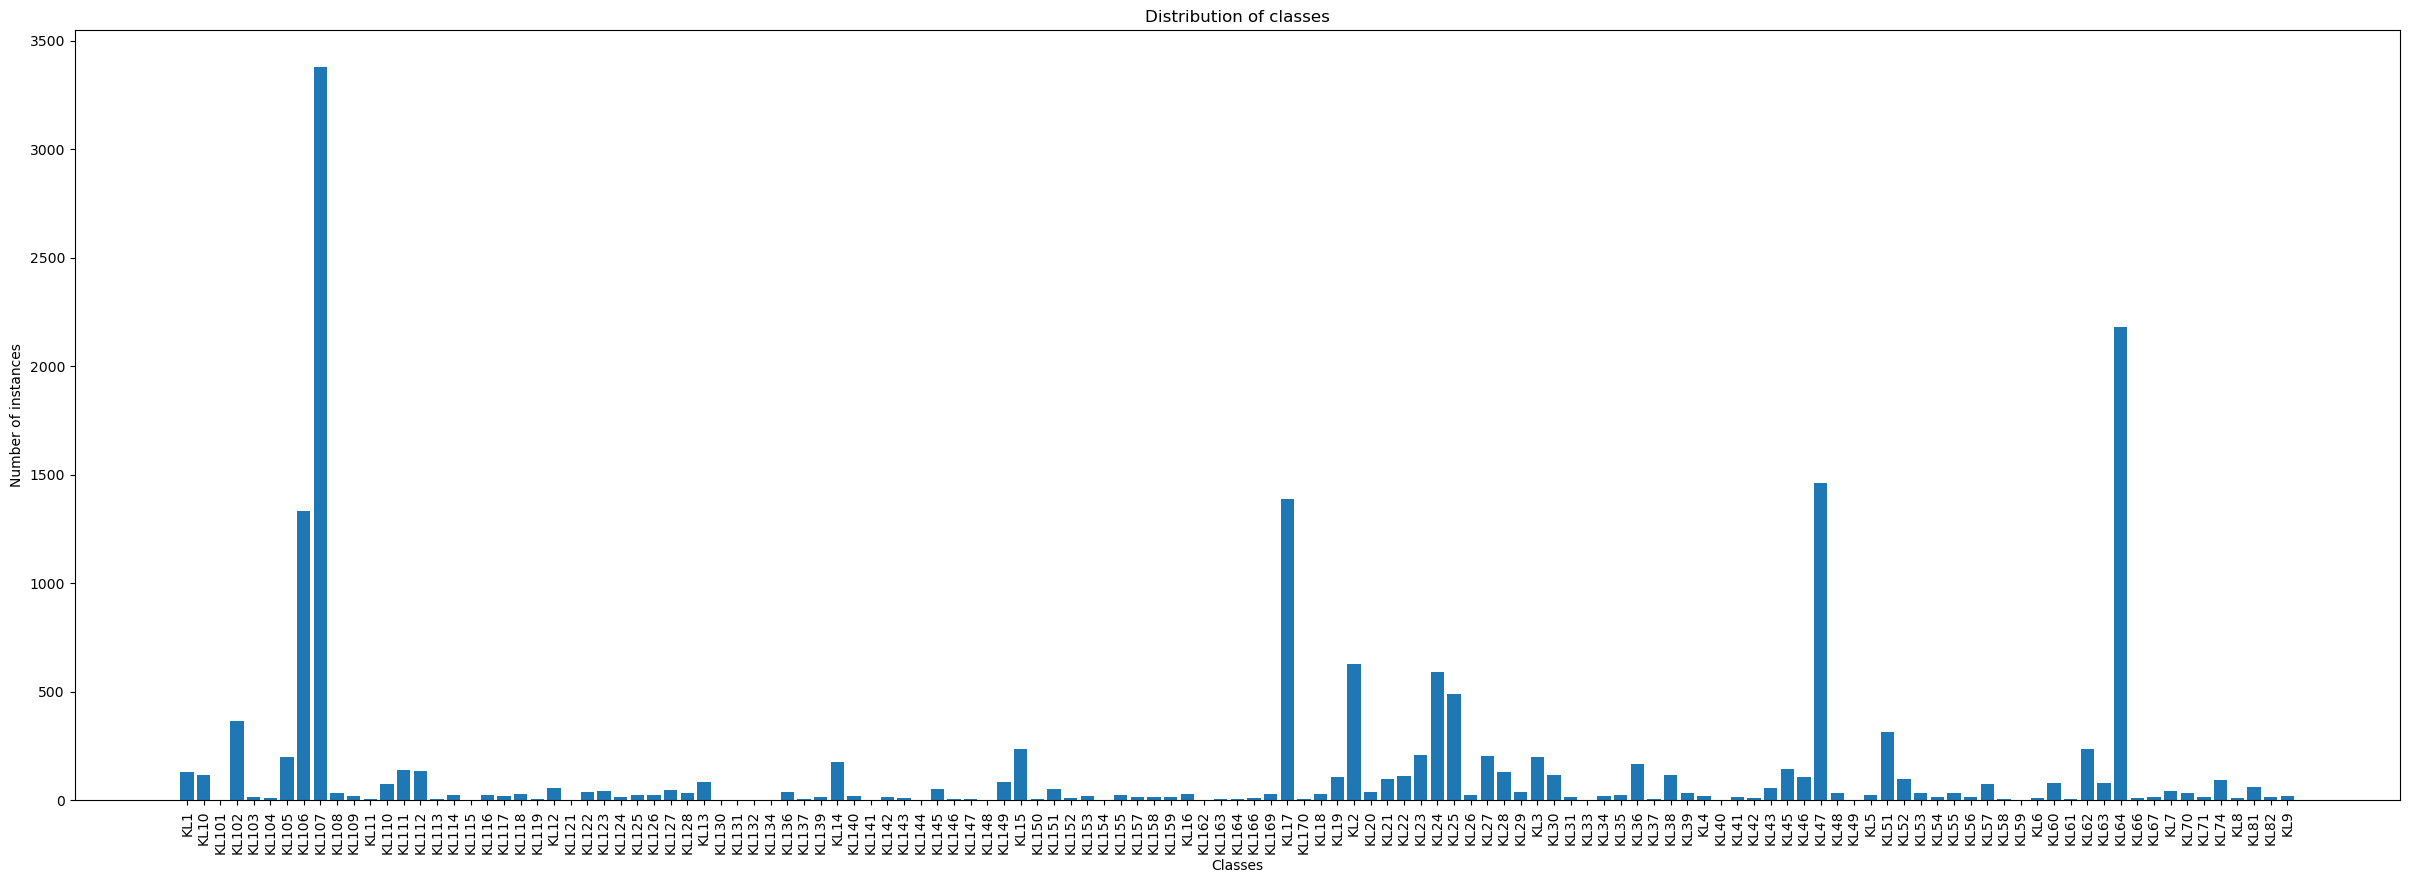

In [2]:
import matplotlib.pyplot as plt

# Assuming dico is your dictionary
dico = {'KL1': 132, 'KL10': 116, 'KL101': 1, 'KL102': 366, 'KL103': 15, 
        'KL104': 8, 'KL105': 198, 'KL106': 1335, 'KL107': 3380, 
        'KL108': 35, 'KL109': 18, 'KL11': 6, 'KL110': 73, 
        'KL111': 140, 'KL112': 135, 'KL113': 7, 'KL114': 24, 
        'KL115': 1, 'KL116': 26, 'KL117': 18, 'KL118': 27, 
        'KL119': 7, 'KL12': 57, 'KL121': 1, 'KL122': 40, 
        'KL123': 41, 'KL124': 13, 'KL125': 26, 'KL126': 22, 
        'KL127': 49, 'KL128': 35, 'KL13': 86, 'KL130': 1, 
        'KL131': 3, 'KL132': 3, 'KL134': 3, 'KL136': 38, 
        'KL137': 6, 'KL139': 14, 'KL14': 178, 'KL140': 18, 
        'KL141': 3, 'KL142': 13, 'KL143': 9, 'KL144': 1, 
        'KL145': 54, 'KL146': 7, 'KL147': 4, 'KL148': 1, 
        'KL149': 83, 'KL15': 238, 'KL150': 7, 'KL151': 54, 
        'KL152': 9, 'KL153': 18, 'KL154': 1, 'KL155': 25, 
        'KL157': 15, 'KL158': 15, 'KL159': 15, 'KL16': 29, 
        'KL162': 2, 'KL163': 5, 'KL164': 7, 'KL166': 8, 
        'KL169': 29, 'KL17': 1389, 'KL170': 7, 'KL18': 28, 
        'KL19': 105, 'KL2': 627, 'KL20': 36, 'KL21': 99, 
        'KL22': 113, 'KL23': 207, 'KL24': 593, 'KL25': 488, 
        'KL26': 23, 'KL27': 205, 'KL28': 129, 'KL29': 40, 
        'KL3': 201, 'KL30': 115, 'KL31': 15, 'KL33': 1, 
        'KL34': 18, 'KL35': 25, 'KL36': 169, 'KL37': 6, 
        'KL38': 117, 'KL39': 32, 'KL4': 19, 'KL40': 1, 
        'KL41': 14, 'KL42': 9, 'KL43': 57, 'KL45': 144, 
        'KL46': 106, 'KL47': 1461, 'KL48': 35, 'KL49': 3, 
        'KL5': 23, 'KL51': 316, 'KL52': 100, 'KL53': 34, 
        'KL54': 14, 'KL55': 33, 'KL56': 16, 'KL57': 76, 
        'KL58': 7, 'KL59': 1, 'KL6': 9, 'KL60': 80, 'KL61': 5, 
        'KL62': 237, 'KL63': 79, 'KL64': 2182, 'KL66': 10, 
        'KL67': 13, 'KL7': 44, 'KL70': 33, 'KL71': 14, 
        'KL74': 92, 'KL8': 12, 'KL81': 61, 'KL82': 13, 'KL9': 21}

# Extract keys and values from the dictionary and sort by keys
keys = sorted(dico.keys())
values = [dico[key] for key in keys]

# Plot
plt.figure(figsize=(30, 10))
plt.bar(keys, values)
plt.xlabel('Classes')
plt.ylabel('Number of instances')
plt.title('Distribution of classes')
plt.xticks(rotation=90)  # rotate x labels for better readability
plt.show()